# Cancer incidence trends in young adults

## Introduction

The idea of this project comes from a conversation I recently have with a friend of mine who worked in a cancer retreat center. The friend is a medical professional who worked at the center for many years. He noticed that over the past 10 years, there have been more relatively young patients in the center than it was before. The friend was inclined to attribute this observation to the deteriorating quality of air, food, and other environmental factors. I skeptically suggested that there are other possible explanations of this phenomenon. 10 years ago, the friend himself was younger and could perceive typical patients as older.

Cancer is a class of diseases in which some of the body’s cells grow uncontrollably and spread to other organs and tissues. Most cancers form a tumor. According to modern concepts, cancer is caused by changes to genes that control the way our cells function, especially how they grow and divide. Despite intensive research and development of new treatments, cancer remains the leading causes of death worldwide. In 2018, there were 18.1 million new cases and 9.5 million cancer-related deaths worldwide. By 2040, the number of new cancer cases per year is expected to rise to 29.5 million and the number of cancer-related deaths to 16.4 million [[1]](#ref_1).

Cancer can be considered an age-related disease because the incidence of most cancers increases with age, rising more rapidly beginning in midlife. Despite the fact that the disease can occur at any age, more than half of all cancers occurred in adults aged ≥65 years [[2]](#ref_2). Therefore, for a long time, cancer was considered a disease predominantly affecting the elderly. Given this age specificity, a possible increase in the number of diseases among younger age groups may be of great interest.


<figure>
  <img src="media/cancer_and_age.jpg" alt="Invasive cancer incidence, by age, U.S., 2009">
  <figcaption>
      <center>
          <strong>
              Figure 1. Invasive cancer incidence, by age, U.S., 2009 <a href="#ref_2">[2]</a>
          </strong>
      </center>
  </figcaption>
</figure>
    
    
As a software developer I am interested in Digital health.
The idea of using information technologies to enhance the efficiency of healthcare seems very promising.
Collection and analysis of health data using the data-science approach could potentially improve our understanding of diseases such as cancer.
Therefore, I decided to further investigate my friend's observation in this project.
Using available data and data-science approach it seems possible to determine if young adults have become more often diagnosed with cancer in recent decades.

## Literature Review

Before setting goals and objectives, I decided to study the available information on this topic.
It is important to understand what has already been investigated and what has not yet been explored.
I found several articles on the Internet in which the issue is studied.
Below I provide a summary and key findings that are relevant in the context of this study.

**Incidence trends for twelve cancers in younger adults—a rapid review. Br J Cancer 126, 1374–1386 (2022). [[5]](#ref_5)**

This paper analyzed the epidemiological information of some types of cancer in young adult patients, and came to the following conclusion: "Overall, this review provides evidence that some cancers are increasingly being diagnosed in younger age groups, although the mechanisms remain unclear." [[5]](#ref_5) This is a meta-analysis of existing studies on different types of cancer, but my goal is to explore the big picture across all types of cancer. The sources used in the article were mainly originated from the United States.

**Trends in Cancer Incidence in US Adolescents and Young Adults, 1973-2015 [[6]](#ref_6)**.

Some findings from this paper: "In this serial cross-sectional, US population-based study using cancer registry data from 497 452 AYAs, the rate of cancer increased by 29.6% from 1973 to 2015, with kidney carcinoma increasing at the greatest rate. Breast carcinoma and testicular cancer were the most common cancer diagnoses for female and male AYAs, respectively." [[6]](#ref_6)

The autors coclude: "In this cross-sectional, US population-based study, cancer in AYAs was shown to have a unique epidemiological pattern and is a growing health concern, with many cancer subtypes having increased in incidence from 1973 to 2015. Continued research on AYA cancers is important to understanding and addressing the distinct health concerns of this population." [[6]](#ref_6) AYA is stands for Adolescents and Young Adults.

The findings from this paper also support the idea that the increase in the number of diseases among young people in the United states has natural causes. However, the article is again focused on the United States.

**Cancer Stat Facts: Cancer Among Adolescents and Young Adults (AYAs) (Ages 15–39) [[7]](#ref_7).**

The results of this work once again confirm the increase in the number of diseases amoung young adults in the United Satates: "Using statistical models for analysis, rates of new cancer cases of any site among AYAs have been rising on average 0.3% each year over 2010–2019, the last 10 years of available data." [[7]](#ref_7). This study is based on a database provided by National Cancer Institute of US. This is a high fidelity database, but it covers only ths U.S. This work uses great data visualization methods that I want to use for inspiration.

As a result of a review of the literature available on the Internet on this topic, I found that there is ample evidence of an increase in the number of diseases among young adults in the United States. However, there are no studies on other regions and on worldwide population.

## Aims and Objectives

According to the available literature, there is a trend in the United States that young people are more likely to get cancer in recent decades. However, the question remained unexplored whether there is such a trend around the world. My goal within this project is to fill this gap. I want to know if this is a global trend or this is pecific for certain regions.

The literature cited above suggests that the causes for the trend observed in the US remain unclear. If a similar trend takes place in the rest of the world, this may help in finding its causes. Since in this case the reasons may be common to the entire planet, and not specific to a particular region. However, the search for the causes is beyond the scope of this study.

For the purpose of this project, a young adult is considered to be between the ages of 15 and 44 (inclusive). This range was chosen because people younger than 15 have other types of cancer with different epidemiological dynamics that are outside the scope of this study [[3]](#ref_3). The age group over 45 also has its own epidemiological dynamics. It has long seen an increase in morbidity, but it is attributed mainly to an increase in overall life expectancy and a decrease in mortality from other causes [[4]](#ref_4). This is also outside the scope of this study.

## Dataset

### Requirements

To meet the goals of the project, the dataset must include worldwide cancer incidence statistics. Data must have at least two dimensions: the numbers should be broken down by year of diagnosis and a patient's age group. To pinpoint the trend, we need data for at least two decades. The data should be in machine-readable format.

### Datasets considered

There are several organizations that collect statistics on cancer. In particular, the previously mentioned [National Cancer Institute (NCI)](https://www.nih.gov/about-nih/what-we-do/nih-almanac/national-cancer-institute-nci) provides SEER database. [SEER](https://seer.cancer.gov/) (Surveillance, Epidemiology, and End Results) is an authoritative source for cancer statistics in the United States. As previously metioned, this is a open and high fidelity database, but it covers only ths U.S. so it is not suitable for our research. Another problem is that this dataset is not generaly available in machine-readable format.

Another considered dataset is [Cancer registration statistics for England](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/datasets/cancerregistrationstatisticscancerregistrationstatisticsengland) provided by Office for National Statistics. The data includes cancer diagnoses and age-standardised incidence rates for all types of cancer by age and sex. It is available in a machine-readable format as Excel tables. Despite the fact that these are data for one geographic region, from these files I get an idea in what form such statistics can be provided at all.

### Choosen dataset

After research of different sources concerning the subject I found that there is an organization [International Agency for Research on Cancer (IARC)](https://www.iarc.fr/) that is a part of the World Health Organization of the United Nations. Its role is to conduct and coordinate research into the causes of cancer. It also collects and publishes surveillance data regarding the occurrence of cancer worldwide.

This data comes in datasets called [Cancer Incidence in Five Continents (CI5)](https://ci5.iarc.fr/Default.aspx). CI5 is the result of a long collaboration between the International Agency for Research on Cancer and the International Association of Cancer Registries. The series of monographs, published approximately every five years, has become the reference source of data on the international incidence of cancer. [[8]](#ref_8)

The whole dataset consists of separate publications (volumes) with data for different periods.
These volumes are identified by Roman numerals (V, VI, VII, etc).
The first 6 volumes (V, VI, VII, VIII, IX, and X) cover the period from 1973 till 2007.
The last volume (XI) covers the period from 2008 till 2012.
These publications are PDF files with very detailed reports on the incidence of cancer in different countries.
Files with detailed source data are also provided along with reports.
They are of primary interest to us.

The first 6 volumes are considered archived, they are downlable on [this page](https://ci5.iarc.fr/CI5I-X/Pages/download.aspx).
There are PDF reports and ZIP files with tabulated detailed (source) data.
The latest volume is downlable on [this page](https://ci5.iarc.fr/CI5-XI/Pages/download.aspx).

This dataset covers a large period of time from 1973 till 2012. The raw data is provided in machine-readable format (CSV, tabulated). There are detailed data on date of diagnosis, patient's age group, sex, geographic region, and cancer type. This is the most comprehensive source of information on cancer incidences in the world. Thus, this dataset is fully suitable for this study.

## Method

After a more detailed examine of the dataset files, some problems were identified.
The first problem is size of the dataset: more than 215 MB unziped.
This is much more than the stated limit.
The second problem is the extreme heterogeneity of the data.
Each of these seven volumes has a different data format.
Some files are in the form CSV, some are tab-separated.
Different field names and other differences.

To overcome these difficulties, I decided to divide the data analysis process into several stages:

### Preprocessing

At this stage, we create a dataset from the raw CI5 files.
The raw CI5 files are individual reports (volumes) that were published at different times.
These volumes have different data format.
So we have separate sections for each volume (Volume V, Volume VI, Volume VII, etc.)
We download raw files, unzip, cleansing, aggregate, and save only necessary information to a CSV file _dataset.csv_ that serve as a source for the further stages.
This file is relatively small and can be cached, so there is no need to run this stage more than once. 

### Processing

At this stage I no longer touch the raw CI5 files. The only source of the information is the intermediate dataset we generated at the Preprocessing stage. It is more precise cleansing and preparation for analysis.

### Analysis

I want to explore the dataset through different lenses, in particular:
* Dynamics of the total number of registered cancer cases in the world in the recent decades.
* Dynamics of registered cancer cases in the world in younge adults in the recent decades.
* Dynamics of the percentage of young people among all cases in the recent decades.

My assumption is that the evaluation of these metrics will be enough to answer this project's question: Is there a world trend that young people are more likely to be diagnosed with cancer in the recent decades.

## Import necessary libraries

In [1]:
!pip install pandas==1.4.2
!pip install matplotlib==3.5.2

import os
import requests
import zipfile
import re
import io
import codecs
from urllib.parse import urlparse
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## Preprocessing

At this stage, we create a dataset from the raw CI5 files.

As I mentioned above, the raw data consists of 7 separate zip files (volumes).
The total size of these files are more than 215 MB unziped which exceeds the allocated limit.
At the preprocessing stage, I download the original CI5 files, remove all irrelevant information from them, and merge the result into one file _dataset.csv_.
Thus, the result of this stage is one relatively small file _dataset.csv_ that serve as a data source for the further stages.

**Important:** If you have dataset.csv you can skip the whole Preprocessing section and go right to the Processing section.

First, download "detailed data" files from https://ci5.iarc.fr/ci5i-x/pages/download.aspx and https://ci5.iarc.fr/CI5-XI/Pages/download.aspx for each volumes:

In [2]:
urls = (
    "https://ci5.iarc.fr/ci5i-x/old/vol5/CI5-V.zip",
    "https://ci5.iarc.fr/ci5i-x/old/vol6/CI5-VI.zip",
    "https://ci5.iarc.fr/ci5i-x/old/vol7/CI5-VIId.zip",
    "https://ci5.iarc.fr/ci5i-x/old/vol8/CI5-VIIId.zip",
    "https://ci5.iarc.fr/ci5i-x/old/vol9/CI5-IXd.zip",
    "https://ci5.iarc.fr/CI5-X/CI5-Xd.zip",
    "https://ci5.iarc.fr/CI5-XI/CI5-XI.zip"
)

# create a new dir CI5 to save volume files
os.makedirs("CI5", exist_ok=True)

def download_if_not_exists(url, path):
    """Download a file from the url and save to the path only if file does not already exist"""
    if os.path.exists(path):
        print(f"File {path} exists in cache")
    else:
        print(f"Downloading {url}...")
        response = requests.get(url)
        # check for HTTP errors
        assert response.ok, f"Failed to download a file {url}. Please try again."

        print(f"Save to {path}")
        open(path, "wb").write(response.content)
            

def unzip(file_path, target_dir):
    """Extract ZIP file file_path to target_dir"""
    print(f"Extract {file_path} to {target_dir}")
    with zipfile.ZipFile(file_path, "r") as zip_ref:
        zip_ref.extractall(target_dir)

# Download all files from urls, save it to CI5 folder, unzip
for url in urls:
    url_path = urlparse(url).path
    file_name = os.path.basename(url_path)
    file_path = os.path.join("CI5", file_name)
    volume_name = os.path.splitext(file_name)[0]
    volume_path = os.path.join("CI5", volume_name)

    if os.path.exists(volume_path):
        print(f"Volume {volume_name} exists in cache")
    else:
        download_if_not_exists(url, file_path)
        unzip(file_path, os.path.join("CI5", volume_name))

Volume CI5-V exists in cache
Volume CI5-VI exists in cache
Volume CI5-VIId exists in cache
Volume CI5-VIIId exists in cache
Volume CI5-IXd exists in cache
Volume CI5-Xd exists in cache
Volume CI5-XI exists in cache


### Volume V

This is the first CI5 volume covers period from 1973 till 1982. It is a zip archive with 4 files. The layout of the data files are:

* cancers.txt — List of [diagnostic groups](https://ci5.iarc.fr/CI5I-X/Pages/cancer_vol10.aspx). It represents anatomical sites where cancer occurs.
* registry.txt — list of regions and years of observation
* cases.csv — Number of cases by sex, five-year age group and a cancer code from cancers.txt
* pops.csv — Number of people at risk by five-year age group

I will user Pandas dataframe to load and join data from registry.txt and cases.csv. Pandas looks like a suitable tool as it makes it easy to perform such operations on heterogeneous data. As a result of each volume processing step, we will get a dataframe in the following form:

Period | N0_4 | N5_9 | ... | N85+ | N_UNK
-------|------|------|-----|------|-------
1973-1982 | 104 | 60 | ... | 1513 | 50
1977-1981 | 97 | 40 | ... | 10 | 50
...      | ... | ... | ...| ... | ...
1982-1982 | 55 | 22 | ... | 436 | 18

* __Period__ is a time interval arbitrary number of years. Periods can overlap with each other.
* __N0_4, N5_9__ — are five-year age groups. There are the number of recorded cases for patients in each age groups per each period.
* __N85+__ — is a special age group for patients over 85
* __N_UNK —__ is a special age group for patients with unknown age

So, each row in this intermediate dataset is a time period (from_year-till_year). Each column is a partient's age group.

In [3]:
# registry.txt is Tab-separated, while cases.csv is comma-separated
v_registry_df = pd.read_csv("CI5/CI5-V/registry.txt", sep="\t", index_col=0)
v_cases_df = pd.read_csv("CI5/CI5-V/cases.csv", index_col=0)

# it uses a registry ID as a primary key to join two dataframes
v_df = v_registry_df.join(v_cases_df, how="inner", lsuffix="_registry")

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
v_df["PERIOD"] = v_df["PERIOD_1"].astype(str) + '-' + v_df["PERIOD_2"].astype(str)

# remove columns with irrelevant information
v_df.drop(columns=['ETHNIC_GROUP_registry', 'PERIOD_1', 'PERIOD_2', 'NAME', 'ETHNIC_GROUP',
       'SEX', 'CANCER', 'TOTAL'], inplace=True)

v_df = v_df.groupby(["PERIOD"]).sum()

# v_df # uncomment to display data for this volume

### Volume VI

The second volume covers a period from 1981 till 1989.
Technically, this volume is almost the same as the previous.
Except it has slightly different column names.

In [4]:
# registry.txt is Tab-separated, while cases.csv is comma-separated
vi_registry_df = pd.read_csv("CI5/CI5-VI/registry.txt", sep="\t", index_col=0, names=["REGISTRY", "PERIOD_1", "PERIOD_2", "NAME"])
vi_cases_df = pd.read_csv("CI5/CI5-VI/cases.csv", index_col=0)

# it uses a registry ID as a primary key to join two dataframes
vi_df = vi_registry_df.join(vi_cases_df, how="inner", lsuffix="_registry")

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
vi_df["PERIOD"] = vi_df["PERIOD_1"].astype(str) + '-' + vi_df["PERIOD_2"].astype(str)

# remove columns with irrelevant information
vi_df.drop(columns=['PERIOD_1', 'PERIOD_2', 'NAME', 'SEX', 'CANCER', 'TOTAL'], inplace=True)

vi_df = vi_df.groupby("PERIOD").sum()

# rename column names to a standard form
vi_df.rename(columns={"N85": "N85+", "N_unk": "N_UNK"}, inplace=True)

# vi_df # uncomment to display data for this volume

### Volume VIId

This volume covers a period from 1983 till 1994. It has a different format than the previous two.

In [5]:
viid_registry_df = pd.read_csv("CI5/CI5-VIId/registry.txt", index_col=0, names=["REGISTRY", "NAME"])
viid_cases_df = pd.read_csv("CI5/CI5-VIId/CI5VII.csv", names=["REGISTRY", "SEX", "CANCER_NUMBER", "AGE", "CASES_COUNT", "PERSON_YEARS"])

# remove the first row as it is a broken header
viid_registry_df = viid_registry_df[1:]

# Extract years from NAME column using Regex
viid_registry_df = viid_registry_df["NAME"].str.extract(r"(.+)\s+\((\d+)-(\d+)\)", expand=True) \
                                           .rename(columns= {1: "PERIOD_1", 2: "PERIOD_2"})

# We have different AGE codes in this file, so we need to convert it to the standard form
AGE_GROUP_CODES_MAPPING = {1: "N0_4", 2: "N5_9", 3: "N10_14", 4: "N15_19", 5: "N20_24", 6: "N25_29", 7: "N30_34",
                           8: "N35_39", 9: "N40_44", 10: "N45_49", 11: "N50_54", 12: "N55_59", 13: "N60_64",
                           14: "N65_69", 15: "N70_74", 16: "N75_79", 17: "N80_84", 18: "N85+", 19: "N_UNK"}

viid_cases_df["AGE"].replace(AGE_GROUP_CODES_MAPPING, inplace=True)

# Here we have a magic code that simply pivot the dataframe to have a compatible format
viid_cases_df = viid_cases_df.groupby(["REGISTRY", "AGE"])["CASES_COUNT"].sum().to_frame().reset_index() \
                             .pivot(index="REGISTRY", columns="AGE", values="CASES_COUNT")

# Convert registry ID to int to be compatible with viid_cases_df's index to be able to join it
viid_registry_df.index =  viid_registry_df.index.astype(int)

# it uses a registry ID as a primary key to join two dataframes
viid_df = viid_registry_df.join(viid_cases_df, how="inner", lsuffix="_registry")

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
viid_df["PERIOD"] = viid_df["PERIOD_1"].astype(str) + '-' + viid_df["PERIOD_2"].astype(str)

# remove columns with irrelevant information
viid_df.drop(columns=[0, 'PERIOD_1', 'PERIOD_2'], inplace=True)

viid_df = viid_df.groupby("PERIOD").sum()

# viid_df # uncomment to display data for this volume

### Volume VIIId

This volume covers a period from 1991 till 1998. It has a similar format that the previous one. Except it has slightly different registry.txt format.

In [6]:
viiid_registry_df = pd.read_table("CI5/CI5-VIIId/registry.txt", index_col=0)
viiid_cases_df = pd.read_csv("CI5/CI5-VIIId/CI5-VIII.csv", names=["REGISTRY", "SEX", "CANCER_NUMBER", "AGE", "CASES_COUNT", "PERSON_YEARS"])

# Extract years from index column using Regex
viiid_registry_df = viiid_registry_df.index.str.extract(r"\s*(\d+)\s+(.*)\((\d+)(-(\d+))?\)", expand=True).drop(columns=3)
viiid_registry_df = viiid_registry_df.rename(columns= {0: "REGISTRY", 1: "NAME", 2: "PERIOD_1", 4: "PERIOD_2"}).set_index("REGISTRY")

# Use of AGE_GROUP_CODES_MAPPING from the previous volume to convert AGE to the standard format
viiid_cases_df["AGE"].replace(AGE_GROUP_CODES_MAPPING, inplace=True)

# Here we have a magic code that simply pivot the dataframe to have a compatible format
viiid_cases_df = viiid_cases_df.groupby(["REGISTRY", "AGE"])["CASES_COUNT"].sum().to_frame().reset_index() \
                               .pivot(index="REGISTRY", columns="AGE", values="CASES_COUNT")

# Convert registry ID to int to be compatible with viid_cases_df's index to be able to join it
viiid_registry_df.index = viiid_registry_df.index.astype(int)

# It uses a registry ID as a primary key to join two dataframes
viiid_df = viiid_registry_df.join(viid_cases_df, how="inner", lsuffix="_registry")

# Fix illegal values in the record for Taiwan
viiid_df.loc[81, 'PERIOD_1'] = 1993
viiid_df.loc[81, 'PERIOD_2'] = 1997

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
viiid_df["PERIOD"] = viiid_df["PERIOD_1"].astype(str) + '-' + viiid_df["PERIOD_2"].astype(str)

viiid_df = viiid_df.groupby(["PERIOD"]).sum()

# viiid_df # uncomment to display data for this volume

### Volume IXd

This volume covers a period from 1996 till 2002. It uses a different data format when cancer cases from different registers stored in different files _CI5/CI5-IXd/{registry_id}.csv_.

In [7]:
ixd_registry_df = pd.read_table("CI5/CI5-IXd/registry.txt", names=["REGISTRY", "NAME"], index_col=0)

# Extract years from index column using Regex
ixd_registry_df = ixd_registry_df["NAME"].str.extract(r"\s*(.*)\s*\((\d+)-(\d+)\)", expand=True) \
                                         .rename(columns= {0: "NAME", 1: "PERIOD_1", 2: "PERIOD_2"})

# Load case record files for each registry and append it to registry_dfs array
registry_dfs = []
for registry in ixd_registry_df.index:
    df = pd.read_csv(f"CI5/CI5-IXd/{registry}.csv", names=["SEX", "CANCER_NUMBER", "AGE", "CASES_COUNT", "PERSON_YEARS"])
    df['REGISTRY'] = registry
    registry_dfs.append(df)

# Merge all register files into one dataframe
ixd_cases_df = pd.concat(registry_dfs)

# Use of AGE_GROUP_CODES_MAPPING from the previous volume to convert AGE to the standard format
ixd_cases_df["AGE"].replace(AGE_GROUP_CODES_MAPPING, inplace=True)

# Here we have a magic code that simply pivots the dataframe to have a compatible format
ixd_cases_df = ixd_cases_df.groupby(["REGISTRY", "AGE"])["CASES_COUNT"].sum().to_frame().reset_index() \
                           .pivot(index="REGISTRY", columns="AGE", values="CASES_COUNT")

# It uses a registry ID as a primary key to join two dataframes
ixd_df = ixd_registry_df.join(ixd_cases_df, how="inner", lsuffix="_registry")

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
ixd_df["PERIOD"] = ixd_df["PERIOD_1"].astype(str) + '-' + ixd_df["PERIOD_2"].astype(str)

ixd_df = ixd_df.groupby(["PERIOD"]).sum()

# ixd_df # uncomment to display data for this volume

### Volume Xd

This volume covers a period from 2003 till 2007. It has a similar format that the previous one.

In [8]:
# A file CI5/CI5-XI/registry.txt contains unicode errors which cause error when read it directly with pd.read_table()
with codecs.open("CI5/CI5-Xd/registry.txt", 'r', 'utf8', errors="ignore") as ff:
    content = ff.read()

# load a dataframe from the string
xd_registry_df = pd.read_table(io.StringIO(content), names=["REGISTRY", "NAME"], index_col=0)

# Extract years from index column using Regex
xd_registry_df = xd_registry_df["NAME"].str.extract(r"\s*(.*)\s*\((\d+)-(?:\d+,\d+-)?(\d+)\)", expand=True) \
                                       .rename(columns= {0: "NAME", 1: "PERIOD_1", 2: "PERIOD_2"})

# Load case record files for each registry and append it to registry_dfs array
registry_dfs = []
for registry in xd_registry_df.index:
    df = pd.read_csv(f"CI5/CI5-Xd/{registry}.csv", names=["SEX", "CANCER_NUMBER", "AGE", "CASES_COUNT", "PERSON_YEARS"])
    df['REGISTRY'] = registry
    registry_dfs.append(df)

# Merge all register files into one dataframe
xd_cases_df = pd.concat(registry_dfs)

# Use of AGE_GROUP_CODES_MAPPING from the previous volume to convert AGE to the standard format
xd_cases_df["AGE"].replace(AGE_GROUP_CODES_MAPPING, inplace=True)

# Here we have a magic code that simply pivots the dataframe to have a compatible format
xd_cases_df = xd_cases_df.groupby(["REGISTRY", "AGE"])["CASES_COUNT"].sum().to_frame().reset_index() \
                         .pivot(index="REGISTRY", columns="AGE", values="CASES_COUNT")

# It uses a registry ID as a primary key to join two dataframes
xd_df = xd_registry_df.join(xd_cases_df, how="inner", lsuffix="_registry")

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
xd_df["PERIOD"] = xd_df["PERIOD_1"].astype(str) + '-' + xd_df["PERIOD_2"].astype(str)

xd_df = xd_df.groupby(["PERIOD"]).sum()

# xd_df # uncomment to display data for this volume

### Volume XI

The is the latest volume covers the period from 2008 till 2012. Technicaly, it differs from the previous one, uses the format of the old volumes.

In [9]:
# A file CI5/CI5-XI/registry.txt contains unicode errors which cause error when read it directly with pd.read_table()
with codecs.open("CI5/CI5-XI/registry.txt", 'r', 'utf8', errors="ignore") as ff:
    content = ff.read()

# Here we have one file cases.csv as in the older volumes
xi_cases_df = pd.read_csv("CI5/CI5-XI/cases.csv", index_col=0)

# load a dataframe from the string
xi_registry_df = pd.read_table(io.StringIO(content), names=["REGISTRY", "NAME"], index_col=0)

# Extract years from index column using Regex
xi_registry_df = xi_registry_df["NAME"].str.extract(r"\s*(.*)\s*\((\d+)-(?:\d+,\d+-)?(\d+)\)", expand=True)\
                                       .rename(columns= {0: "NAME", 1: "PERIOD_1", 2: "PERIOD_2"})

# It uses a registry ID as a primary key to join two dataframes
xi_df = xi_registry_df.join(xi_cases_df, how="inner")

# join two fields with start and end years into one field PERIOD in a format "1995-1998"
xi_df["PERIOD"] = xi_df["PERIOD_1"].astype(str) + '-' + xi_df["PERIOD_2"].astype(str)

xi_df = xi_df.groupby(["PERIOD"]).sum()

# rename column names to a standard form
xi_df.rename(columns={"N85": "N85+", "N_unk": "N_UNK"}, inplace=True)

# xi_df # uncomment to display data for this volume

### Save results

Merge data from all volumes and save to onle intermediate CSV file that serve as a source for the further stages. This file is relatively small and can be cached, so there is no need to run Preprocessing stage more than once.

In [10]:
df = pd.concat([v_df, vi_df, viid_df, viiid_df, ixd_df, xd_df, xi_df])
df.to_csv("dataset.csv")

## Processing

At this stage I no longer touch the raw CI5 files. The only source of the information is a dataset we generated at the previous stage: _dataset.csv_. Each row in this dataset is a time period (from_year-till_year). Each column of this dataset is a partient's age group (N0_4, N5_9, etc.) This format reflects the original form of the data. In the raw CI5 files we did not have a breakdown by year, but there were periods of several years. Some periods overlap each other. 

This data format is difficult to visualize and analyze because we don't have information for every specific year. The goal of this stage is to recast the existing dataset to a form suitable for analysis at the next stage.

In [11]:
# Check if the dataset is ready
assert os.path.exists("dataset.csv"), "dataset.csv does not exists, please run Preprocessing stage"

df = pd.read_csv("dataset.csv", index_col=0)

years = df.index.str.extract("(\d+)-(\d+)", expand=True)
years_count = (years[1].astype(int) - years[0].astype(int) + 1)
years_count.set_axis(df.index, inplace=True)

df = df.floordiv(years_count, axis=0)
df.reset_index(inplace=True)
df.insert(1, "YEAR", df["PERIOD"].str.extract("(\d+)-(\d+)", expand=True).apply(lambda x : list(range(int(x[0]), int(x[1])+1)), axis=1))
df = df.explode("YEAR")
df.reset_index(inplace=True)
df.drop(columns=["index", "PERIOD"], inplace=True)
df = df.groupby("YEAR").sum()
df.head()

,N0_4,N5_9,N10_14,N15_19,N20_24,N25_29,N30_34,N35_39,N40_44,N45_49,...,N60_64,N65_69,N70_74,N75_79,N80_84,N85+,N_UNK,SEX,CANCER,TOTAL
YEAR,,,,,,,,,,,,,,,,,,,,,
1973,10,6,8,10,19,22,31,45,61,96,...,202,246,272,236,222,151,0,0.0,0.0,0.0
1974,10,6,8,10,19,22,31,45,61,96,...,202,246,272,236,222,151,0,0.0,0.0,0.0
1975,10,6,8,10,19,22,31,45,61,96,...,202,246,272,236,222,151,0,0.0,0.0,0.0
1976,10,6,8,10,19,22,31,45,61,96,...,202,246,272,236,222,151,0,0.0,0.0,0.0
1977,5122,3576,2861,4333,5335,9055,14381,14798,20635,31154,...,71547,106349,107060,80649,47391,26982,2501,0.0,0.0,0.0


In [12]:
df.tail()

,N0_4,N5_9,N10_14,N15_19,N20_24,N25_29,N30_34,N35_39,N40_44,N45_49,...,N60_64,N65_69,N70_74,N75_79,N80_84,N85+,N_UNK,SEX,CANCER,TOTAL
YEAR,,,,,,,,,,,,,,,,,,,,,
2008,117091,64448,73361,125555,205446,339283,510044,784525,1308915,2205168,...,5424524,5775077,5359155,4738410,3791839,3353773,1109,17469.0,372691.0,41955526.0
2009,117455,64678,73558,125827,205954,340136,511389,786952,1312801,2210790,...,5431726,5781314,5365506,4743722,3795163,3355792,1109,17894.0,381763.0,42016299.0
2010,118613,65366,74268,127048,207955,343313,516568,795756,1326236,2229392,...,5462061,5810498,5397250,4772031,3814841,3367913,1459,18965.0,404611.0,42273525.0
2011,117624,64754,73540,125905,206119,340252,511136,787020,1312199,2207831,...,5411259,5753653,5336475,4713624,3769572,3333067,1446,17390.0,371011.0,41836938.0
2012,116821,64222,72926,124858,204470,337685,506939,780578,1302184,2193493,...,5383837,5723832,5305315,4683903,3747025,3315440,1375,16162.0,344803.0,41594841.0


## Analysis

Let's visualize dynamics of the total number of registered cancer cases in the world:

<AxesSubplot:title={'center':'Numer of cancer cases reported in CI5 dataset'}, xlabel='YEAR', ylabel='Number of cases'>

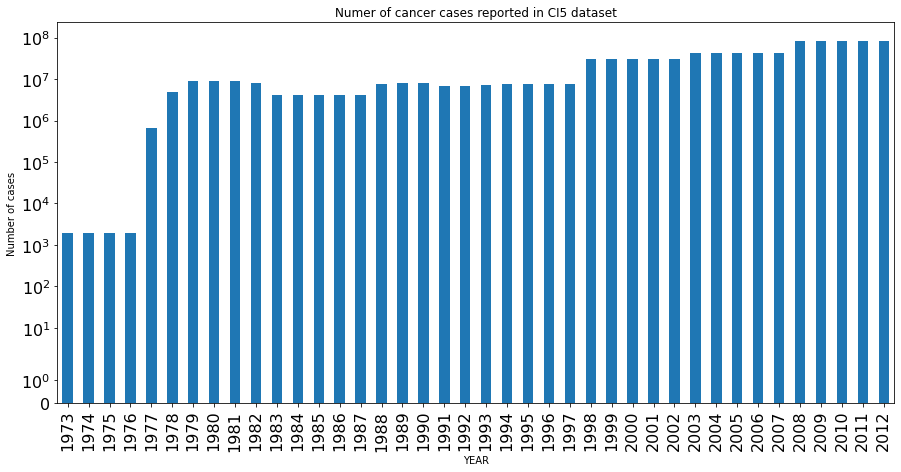

In [13]:
total_cases = df.sum(axis=1)
total_cases.plot(kind="bar", logy="sym", figsize=(15,7), ylabel="Number of cases",
                 title="Numer of cancer cases reported in CI5 dataset", fontsize=16)

As we can see from this graph, the number of reported cancer cases increases in steps over time. Remember, our dataset consists of individual reports (volumes) that were published at different times. Different reports had different coverage of regions. These steps show the boundaries of different volumes. As we can see, over time the coverage has improved and this was reflected in more reported cases on the right side of the graph.  Unfortunately, due to this feature, we cannot rely on absolute values in our dataset.

Let's visualize dynamics of registered cancer cases in the world in younge adults in the recent decades:

<AxesSubplot:title={'center':'Numer of cancer cases reported in CI5 dataset for 15-44 years old patients'}, xlabel='YEAR', ylabel='Number of cases'>

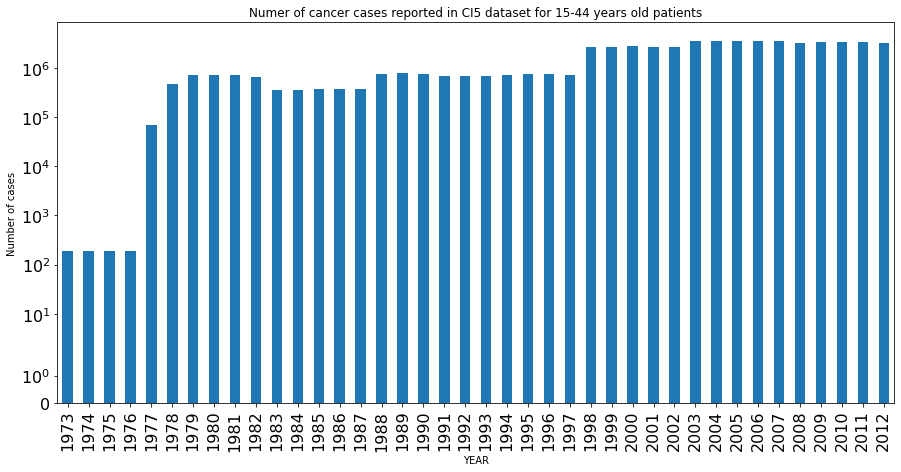

In [14]:
young_adults_cases = df["N15_19"] + df["N20_24"] + df["N25_29"] + df["N30_34"] + df["N35_39"] + df["N40_44"]
young_adults_cases.plot(kind="bar", logy="sym", figsize=(15,7), ylabel="Number of cases", fontsize=16,
                    title="Numer of cancer cases reported in CI5 dataset for 15-44 years old patients")

Here we see almost the same figure as previous one. From this we can conclude that more cases of cancer have been reported among younger patients in recent decades. However, this feature of the dataset may not reflect the actual dynamics. To better understand this data, you need to look at relative numbers.

Let's visualize dynamics of the percentage of young people among all cases in the recent decades.

<AxesSubplot:title={'center':'Percentage of 15-44 years old patients among all reported cancer cases'}, xlabel='YEAR', ylabel='%'>

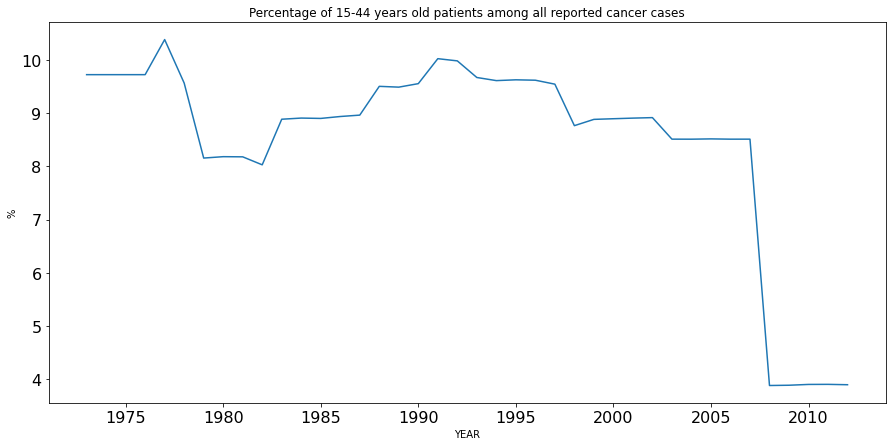

In [15]:
(young_adults_cases / total_cases * 100).plot(figsize=(15,7), ylabel="%", fontsize=16,
                                        title="Percentage of 15-44 years old patients among all reported cancer cases")

The graph shows that the percentage of young patients among all recorded cancer cases is around 9% and not very volatile over time. There is no trend for a significant increase in the proportion of young patients in recent years.

## Conclusion

In the reviewed literature, there is evidence of an increase in the incidence of cancer among young patients in some regions, in particular in the USA. The aim of this project was to analyze the data for the entire world to understand whether such a trend is taking place worldwide, or if it is a local phenomenon. After analyzing the data, I came to the conclusion that on a global scale there is no trend towards an increase in the proportion of young people among all cases of cancer. This result may mean that the causes for the increase in cancer cases in the considered regions are of a local nature and are not the result of any global changes, such as climate change.

## References

<a id='ref_1'>[1]</a> "What Is Cancer?" by National Cancer Institute (2021, May 5) [Online]. Available: https://www.cancer.gov/about-cancer/understanding/what-is-cancer

<a id='ref_2'>[2]</a> "Age and Cancer Risk" Am J Prev Med. 2014 Mar; 46(3 0 1): S7–15. [Online]. Available: https://doi.org/10.1016/j.amepre.2013.10.029

<a id='ref_3'>[3]</a> "Childhood Cancers" by National Cancer Institute (2021, April 12) [Online]. Available: https://www.cancer.gov/types/childhood-cancers

<a id='ref_4'>[4]</a> "The Challenging Landscape of Cancer and Aging: Charting a Way Forward" by Norman E. Sharpless, M.D. (2018, January 24) [Online]. Available: https://www.cancer.gov/news-events/cancer-currents-blog/2018/sharpless-aging-cancer-research

<a id='ref_5'>[5]</a> di Martino, E., Smith, L., Bradley, S.H. et al. Incidence trends for twelve cancers in younger adults—a rapid review. Br J Cancer 126, 1374–1386 (2022). [Online]. Available: https://doi.org/10.1038/s41416-022-01704-x

<a id='ref_6'>[6]</a> Scott AR, Stoltzfus KC, Tchelebi LT, et al. Trends in Cancer Incidence in US Adolescents and Young Adults, 1973-2015. JAMA Netw Open. 2020;3(12):e2027738. [Online]. Available: https://doi.org/10.1001/jamanetworkopen.2020.27738


<a id='ref_7'>[7]</a> Cancer Stat Facts: Cancer Among Adolescents and Young Adults (AYAs) (Ages 15–39) by National Cancer Institute (2022) [Online]. Available: https://seer.cancer.gov/statfacts/html/aya.html

<a id='ref_8'>[8]</a> CI5: CANCER INCIDENCE IN FIVE CONTINENTS by International Agency for Research on Cancer (IARC) [Online]. Available: https://ci5.iarc.fr/Default.aspx